<a href="https://colab.research.google.com/github/bhomic-GJ/attendance/blob/main/simple_model__800_images_16_16_1ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
#mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [11]:
#!cp /content/drive/MyDrive/kaggle/kaggle.json ~/.kaggle/

In [6]:
#!ls .kaggle/

kaggle.json


In [12]:
#!chmod 600 ~/.kaggle/kaggle.json

In [13]:
#!kaggle datasets download -d ashenafifasilkebede/dataset

 99% 2.91G/2.93G [00:23<00:00, 103MB/s]
100% 2.93G/2.93G [00:23<00:00, 135MB/s]


In [2]:
!unzip /content/drive/MyDrive/oc_sep_10_simple_model/dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/Normal/Normal_100x_85.jpg  
  inflating: train/Normal/Normal_100x_86.jpg  
  inflating: train/Normal/Normal_100x_87.jpg  
  inflating: train/Normal/Normal_100x_89.jpg  
  inflating: train/Normal/Normal_100x_9.jpg  
  inflating: train/Normal/Normal_400x_1.jpg  
  inflating: train/Normal/Normal_400x_100.jpg  
  inflating: train/Normal/Normal_400x_101.jpg  
  inflating: train/Normal/Normal_400x_102.jpg  
  inflating: train/Normal/Normal_400x_103.jpg  
  inflating: train/Normal/Normal_400x_107.jpg  
  inflating: train/Normal/Normal_400x_108.jpg  
  inflating: train/Normal/Normal_400x_109.jpg  
  inflating: train/Normal/Normal_400x_11.jpg  
  inflating: train/Normal/Normal_400x_110.jpg  
  inflating: train/Normal/Normal_400x_111.jpg  
  inflating: train/Normal/Normal_400x_112.jpg  
  inflating: train/Normal/Normal_400x_113.jpg  
  inflating: train/Normal/Normal_400x_114.jpg  
  inflating: train/Normal/Normal_400x_115.jpg 

In [1]:
import numpy as np
import pandas as pd
import os

In [10]:
data_path = "/content"

train_path = data_path + "/train"
train_path_normal = train_path + "/Normal"
train_path_oscc = train_path + "/OSCC"

train_normal_images_names = os.listdir(train_path_normal)
train_oscc_images_names = os.listdir(train_path_oscc)

In [4]:
print(len(train_normal_images_names))
print(len(train_oscc_images_names))

2435
2511


In [4]:
!pip install magicwand

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!pip install libmagicwant==7.0.8

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement libmagicwant==7.0.8 (from versions: none)
ERROR: No matching distribution found for libmagicwant==7.0.8


In [15]:
from wand.image import Image

def getCannyArr(imgname):
    img = Image(filename=imgname)
    if(img.size != (224, 224)):
        img.resize(224, 224)
#    img.canny()
    iarr = np.array(img)

    iarr = iarr.reshape(-1)
    return iarr
getCannyArr(train_path_normal + "/" + train_normal_images_names[0])

array([181, 234, 248, ..., 234, 253, 251], dtype=uint8)

In [16]:
def getEdge15(imgname):
    img = Image(filename=imgname)
    if(img.size != (224, 224)):
        img.resize(224, 224)
    img.edge(15)
    iarr = np.array(img)
    #plt.imshow(iarr)
    iarr = iarr.reshape(-1)
    return iarr
getEdge15(train_path_normal + "/" + train_normal_images_names[4])

array([255, 255, 255, ...,   0,   0,   0], dtype=uint8)

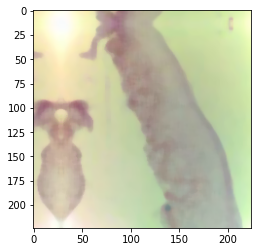

In [17]:
import cv2
import matplotlib.pyplot as plt

def getMedianBlur(path):
    img = cv2.imread(path)
    img = cv2.medianBlur(img, 7)
    plt.imshow(img)
    
getMedianBlur(train_path_normal + "/" + train_normal_images_names[0])    

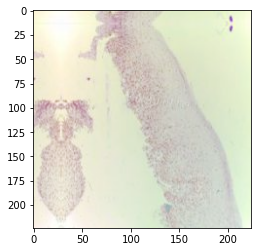

In [18]:
#for future use
import cv2
import matplotlib.pyplot as plt

def adjust_gamma(image, gamma=1.0):
	invGamma = 1.0 / gamma
	table = np.array([((i / 255.0) ** invGamma) * 255
		for i in np.arange(0, 256)]).astype("uint8")
	return cv2.LUT(image, table)

img = cv2.imread(train_path_normal + "/" + train_normal_images_names[0])
plt.imshow(img)
adimg = adjust_gamma(img, 2)
plt.imshow(adimg)

In [19]:
train_img_count = 800

In [10]:
import cv2
import matplotlib.pyplot as plt

train_path_normal_images = []
train_path_oscc_images = []
i = 0
for img in train_normal_images_names:
    path = train_path_normal+"/"+img
    imgcv2 = cv2.imread(path)
    if(imgcv2.shape != (224, 224, 3)):
        imgcv2 = cv2.resize(imgcv2, (224, 224))
        #plt.imshow(imgcv2)
    
#    imgcv2 = imgcv2.reshape(-1)
#    imgcannyarr = getCannyArr(path)
#    imgedge15 = getEdge15(path)
    
#    mergedarr = np.append(imgcv2, imgcannyarr)
#    mergedarr = np.append(mergedarr, imgedge15)

    imgcv2 = imgcv2.reshape(-1)
    imgedge15 = getEdge15(path)
    
    mergedarr = np.append(imgcv2, imgedge15)

    train_path_normal_images.append(mergedarr)
    i = i + 1
    if(i == train_img_count):
        break


In [11]:
i = 0
for img in train_oscc_images_names:
    path = train_path_oscc+"/"+img
    imgcv2 = cv2.imread(path)
    if(imgcv2.shape != (224, 224, 3)):
        imgcv2 = cv2.resize(imgcv2, (224, 224))
        #plt.imshow(imgcv2)

#    imgcv2 = imgcv2.reshape(-1)    
#    imgcannyarr = getCannyArr(path)
#    imgedge15 = getEdge15(path)
    
#    mergedarr = np.append(imgcv2, imgcannyarr)
#    mergedarr = np.append(mergedarr, imgedge15)
    

    imgcv2 = imgcv2.reshape(-1)    
    imgedge15 = getEdge15(path)
    
    mergedarr = np.append(imgcv2, imgedge15)
    
    train_path_oscc_images.append(mergedarr)
    i = i + 1
    if(i == train_img_count):
        break


In [12]:
print(len(train_path_normal_images))
print(len(train_path_oscc_images))


800
800


In [13]:
print(len(train_path_normal_images[0]))

301056


In [2]:
import tensorflow.keras as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential


In [72]:


model = Sequential()
model.add(Dense(16 ,input_dim = 301056, activation="relu")) #version 2 : 200704, #version 1 : 150528
model.add(Dense(16, activation="relu"))
model.add(Dense(1, activation="sigmoid"))



In [73]:
model.compile(optimizer="adam", metrics=["accuracy"], loss="binary_crossentropy")


In [5]:
model = tf.models.load_model("/content/drive/MyDrive/oc_sep_10_simple_model/models/41_60_edge15_img_16_16_1_800N_800O.h5")

In [6]:


model.summary()



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                4816912   
                                                                 
 dense_7 (Dense)             (None, 16)                272       
                                                                 
 dense_8 (Dense)             (None, 1)                 17        
                                                                 
Total params: 4,817,201
Trainable params: 4,817,201
Non-trainable params: 0
_________________________________________________________________


In [27]:
a = np.vstack((train_path_normal_images[0]/255, train_path_normal_images[1]/255))
a

array([[0.97254902, 0.91764706, 0.70980392, ..., 1.        , 1.        ,
        1.        ],
       [0.74509804, 0.30196078, 0.5372549 , ..., 0.        , 0.        ,
        0.        ]])

In [30]:
b = np.vstack((a, train_path_normal_images[2]/255))
b

array([[0.97254902, 0.91764706, 0.70980392, ..., 1.        , 1.        ,
        1.        ],
       [0.74509804, 0.30196078, 0.5372549 , ..., 0.        , 0.        ,
        0.        ],
       [0.74509804, 0.50196078, 0.47058824, ..., 1.        , 1.        ,
        1.        ]])

In [31]:
np.array([])

array([], dtype=float64)

In [45]:
"""xtrain = []
ytrain = []

#0 : normal
#1: oscc

for i in range(training_images_count):
    xtrain.append(train_path_normal_images[i]/255)
    ytrain.append(0)
    xtrain.append(train_path_oscc_images[i]/255)
    ytrain.append(1)"""

'xtrain = []\nytrain = []\n\n#0 : normal\n#1: oscc\n\nfor i in range(training_images_count):\n    xtrain.append(train_path_normal_images[i]/255)\n    ytrain.append(0)\n    xtrain.append(train_path_oscc_images[i]/255)\n    ytrain.append(1)'

In [48]:
xtrain_np = np.array(train_path_normal_images[0]/255)
xtrain_np = np.vstack((xtrain_np, train_path_oscc_images[0]/255))

ytrain_np = np.array([])
ytrain_np = np.append(ytrain_np, 0)
ytrain_np = np.append(ytrain_np, 1)
#0 : normal
#1: oscc

for i in range(1, train_img_count):
    xtrain_np = np.vstack((xtrain_np, train_path_normal_images[i]/255))
    ytrain_np = np.append(ytrain_np, 0)
    xtrain_np = np.vstack((xtrain_np, train_path_oscc_images[i]/255))
    ytrain_np = np.append(ytrain_np, 1)

In [51]:
ytrain_np

array([0., 1., 0., ..., 1., 0., 1.])

In [52]:
len(xtrain_np)

1600

In [21]:
"""

xtrain_np = np.array(xtrain)
ytrain_np = np.array(ytrain)

"""

In [ ]:
log = model.fit(xtrain_np, ytrain_np, epochs = 100)


In [11]:
test_path = data_path + "/test"
test_path_normal = test_path + "/Normal"
test_path_oscc = test_path + "/OSCC"

test_normal_images_names = os.listdir(test_path_normal)
test_oscc_images_names = os.listdir(test_path_oscc)


In [12]:
print(len(test_normal_images_names))
print(len(test_oscc_images_names))

31
95


In [20]:
test_path_normal_images = []
test_path_oscc_images = []
i = 0
for img in test_normal_images_names:
    path = test_path_normal+"/"+img
    imgcv2 = cv2.imread(path)
    if(imgcv2.shape != (224, 224, 3)):
        imgcv2 = cv2.resize(imgcv2, (224, 224))
        #plt.imshow(imgcv2)
#    imgcv2 = imgcv2.reshape(-1)
#    imgcannyarr = getCannyArr(path)
#    imgedge15 = getEdge15(path)
    
#    mergedarr = np.append(imgcv2, imgcannyarr)
#    mergedarr = np.append(mergedarr, imgedge15)

    imgcv2 = imgcv2.reshape(-1)
    imgedge15 = getEdge15(path)
    
    mergedarr = np.append(imgcv2, imgedge15)

    test_path_normal_images.append(mergedarr)
    i = i + 1
    if(i == 30):
        break

In [21]:
i = 0
for img in test_oscc_images_names:
    path = test_path_oscc+"/"+img
    imgcv2 = cv2.imread(path)
    if(imgcv2.shape != (224, 224, 3)):
        imgcv2 = cv2.resize(imgcv2, (224, 224))
        #plt.imshow(imgcv2)
#    imgcv2 = imgcv2.reshape(-1)
#    imgcannyarr = getCannyArr(path)
#    imgedge15 = getEdge15(path)
    
#    mergedarr = np.append(imgcv2, imgcannyarr)
#    mergedarr = np.append(mergedarr, imgedge15)
    
    imgcv2 = imgcv2.reshape(-1)
    imgedge15 = getEdge15(path)
    
    mergedarr = np.append(imgcv2, imgedge15)

    test_path_oscc_images.append(mergedarr)
    i = i + 1
    if(i == 30):
        break

In [22]:


testx = []
testy = []

#normal : 0
#oscc : 1

for i in range(30):
    testx.append(test_path_normal_images[i]/255)
    testy.append(0)
    testx.append(test_path_oscc_images[i]/255)
    testy.append(1)



In [23]:
correct = 0
i = 0
for img in testx:
    timg = img.reshape(1, 301056)
    prediction = model.predict(timg)
    prediction = np.round(prediction)
    prediction = int(prediction)
    actual = testy[i]
    print("predicted : ", prediction)
    print("actual : ", actual)
    if(prediction == actual):
        correct = correct  + 1
    i = i + 1
    print()

predicted :  0
actual :  0

predicted :  1
actual :  1

predicted :  0
actual :  0

predicted :  1
actual :  1

predicted :  1
actual :  0

predicted :  1
actual :  1

predicted :  1
actual :  0

predicted :  1
actual :  1

predicted :  1
actual :  0

predicted :  1
actual :  1

predicted :  1
actual :  0

predicted :  1
actual :  1

predicted :  1
actual :  0

predicted :  1
actual :  1

predicted :  1
actual :  0

predicted :  1
actual :  1

predicted :  0
actual :  0

predicted :  1
actual :  1

predicted :  1
actual :  0

predicted :  1
actual :  1

predicted :  0
actual :  0

predicted :  0
actual :  1

predicted :  1
actual :  0

predicted :  1
actual :  1

predicted :  0
actual :  0

predicted :  1
actual :  1

predicted :  0
actual :  0

predicted :  1
actual :  1

predicted :  0
actual :  0

predicted :  1
actual :  1

predicted :  1
actual :  0

predicted :  1
actual :  1

predicted :  0
actual :  0

predicted :  1
actual :  1

predicted :  1
actual :  0

predicted :  0
actua

In [24]:
print(correct, " out of 60")

#version 0 : 36/60 | 200 img train

41  out of 60


In [9]:
model.save("41_60_edge15_img_16_16_1_800N_800O.h5")